Proyecto Análisis Exploratorio de datos de la API alojada en https://covidtracking.com/data/api

Primeramente realizamos la importación de los datos para su consulta.

In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import MinMaxScaler


respuesta = requests.get('https://api.covidtracking.com/v1/states/daily.csv')

if respuesta.status_code == 200:
    with open('daily.csv', 'wb') as file:
        file.write(respuesta._content)
    print("Archivo CSV guardado como 'daily.csv'")
else:
    print(f"Error al obtener los datos de: {respuesta.status_code}")


Archivo CSV guardado como 'daily.csv'


A continuación hacemos un sondeo del tipo de datos que tenemos.

In [3]:
daily = pd.read_csv('daily.csv')

daily.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


Como son tantos, quizás estaría bien ver algunos más.

In [4]:
daily.head(20)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN
5,20210307,CA,3501394.0,NaN,NaN,NaN,totalTestsViral,49646014.0,4291.0,NaN,...,NaN,258,0,63c5c0fd2daef2fb65150e9db486de98ed3f7b72,0,0,0,0,0,NaN
6,20210307,CO,436602.0,24786.0,2199458.0,NaN,totalTestEncountersViral,6415123.0,326.0,23904.0,...,NaN,3,18,444746cda3a596f183f3fa3269c8cab68704e819,0,0,0,0,0,NaN
7,20210307,CT,285330.0,19621.0,NaN,NaN,totalTestsViral,6520366.0,428.0,NaN,...,NaN,0,0,38f39494134d22cd0d06e4ce63aa4a4ac10aa930,0,0,0,0,0,NaN
8,20210307,DC,41419.0,NaN,NaN,NaN,totalTestEncountersViral,1261363.0,150.0,NaN,...,NaN,0,0,a3aa0d623d538807fb9577ad64354f48cf728cc8,0,0,0,0,0,NaN
9,20210307,DE,88354.0,4733.0,545070.0,NaN,totalTestEncountersViral,1431942.0,104.0,NaN,...,NaN,9,0,059d870e689d5cc19c35f5eb398214d7d9856373,0,0,0,0,0,NaN


Podemos observar que hay columnas mayoritariamante vacías, que pobablemente poco podrán aportar a ningún análisis. Ahora vamos a conseguir una descripción de los datos en forma de algunos estadísticos generales. 

In [5]:
daily.describe()

,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,2.078000e+04,2.059200e+04,9271.000000,1.329000e+04,2138.000000,2.061400e+04,17339.000000,12382.000000,11636.000000,3789.000000,...,2.078000e+04,0.0,20780.000000,20780.000000,20780.0,20780.0,20780.0,20780.0,20780.0,0.0
mean,2.020244e+07,1.651560e+05,21729.123719,8.482246e+05,1659.862956,2.186936e+06,1190.576965,9262.762478,359.621176,1934.191607,...,7.061500e+05,NaN,24.790712,37.360780,0.0,0.0,0.0,0.0,0.0,NaN
std,3.608732e+03,3.267852e+05,45471.459778,1.344501e+06,4671.028548,4.436508e+06,2060.041207,12620.544081,594.831150,1953.329983,...,1.299997e+06,NaN,60.162742,208.237151,0.0,0.0,0.0,0.0,0.0,NaN
min,2.020011e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,6.000000,...,0.000000e+00,NaN,-201.000000,-12257.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,2.020060e+07,5.753750e+03,773.500000,5.394125e+04,43.000000,1.040498e+05,166.500000,985.250000,60.000000,501.000000,...,2.565875e+04,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,2.020090e+07,4.606450e+04,4491.000000,3.059720e+05,212.500000,6.552670e+05,531.000000,4472.000000,172.000000,1295.000000,...,1.935810e+05,NaN,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,2.020120e+07,1.779580e+05,19553.000000,1.056611e+06,1295.750000,2.264766e+06,1279.000000,12248.500000,380.000000,2451.000000,...,7.737408e+05,NaN,24.000000,36.000000,0.0,0.0,0.0,0.0,0.0,NaN
max,2.021031e+07,3.501394e+06,365961.000000,1.018694e+07,64400.000000,4.964601e+07,22851.000000,82237.000000,5225.000000,9263.000000,...,1.124825e+07,NaN,2559.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN


En este resumen, podemos observar que algunos datos no nos sirven para nada, como la media de las fechas, por ejemplo. Pero también tenemos datos muy útiles como medias de casos positivos o negativos, juntos con sus desviaciones típicas o sus cuartiles. A continuación, también quiero observar de qué tipo es cada columna, ya que hay muchas. Además puedo, teniendo en cuenta la información ya obtenida previamente, por ejemplo ver qué columnas son innecesarias y puedo borrar directamente. Además, en la página web encuentro una descripción de la información que aporta cada columna. 

In [6]:
daily.dtypes

date                             int64
state                           object
positive                       float64
probableCases                  float64
negative                       float64
pending                        float64
totalTestResultsSource          object
totalTestResults               float64
hospitalizedCurrently          float64
hospitalizedCumulative         float64
inIcuCurrently                 float64
inIcuCumulative                float64
onVentilatorCurrently          float64
onVentilatorCumulative         float64
recovered                      float64
lastUpdateEt                    object
dateModified                    object
checkTimeEt                     object
death                          float64
hospitalized                   float64
hospitalizedDischarged         float64
dateChecked                     object
totalTestsViral                float64
positiveTestsViral             float64
negativeTestsViral             float64
positiveCasesViral       

Voy a hacer una limpieza de columnas que creo que no necesito o sobre las que no voy a realizar preguntas, al menos de momento. Quizás también renombre algunas para poder trabajar con ellas mejor. 

In [7]:
daily = daily.drop(columns=['hash', 'commercialScore', 'negativeRegularScore', 'negativeScore', 'positiveScore', 'score', 'grade', 'dataQualityGrade'])



In [8]:
daily.dtypes

date                             int64
state                           object
positive                       float64
probableCases                  float64
negative                       float64
pending                        float64
totalTestResultsSource          object
totalTestResults               float64
hospitalizedCurrently          float64
hospitalizedCumulative         float64
inIcuCurrently                 float64
inIcuCumulative                float64
onVentilatorCurrently          float64
onVentilatorCumulative         float64
recovered                      float64
lastUpdateEt                    object
dateModified                    object
checkTimeEt                     object
death                          float64
hospitalized                   float64
hospitalizedDischarged         float64
dateChecked                     object
totalTestsViral                float64
positiveTestsViral             float64
negativeTestsViral             float64
positiveCasesViral       

Voy a ver si ahora que he borrado columnas, me deja ver las que no podía ver antes. 

In [9]:
daily.head(20)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,NaN,2,0,0,56886,0,56886,0,0
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,NaN,1,408,2087,2431530,2347,2431530,-1,0
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,NaN,5,165,3267,2805534,3380,2805534,22,11
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,NaN,60,0,0,2140,0,2140,0,0
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,NaN,4,1335,13678,3899464,45110,3899464,5,44
5,20210307,CA,3501394.0,NaN,NaN,NaN,totalTestsViral,49646014.0,4291.0,NaN,...,NaN,NaN,6,3816,0,3501394,133186,3501394,258,0
6,20210307,CO,436602.0,24786.0,2199458.0,NaN,totalTestEncountersViral,6415123.0,326.0,23904.0,...,NaN,NaN,8,840,0,2636060,38163,2636060,3,18
7,20210307,CT,285330.0,19621.0,NaN,NaN,totalTestsViral,6520366.0,428.0,NaN,...,396680.0,22245.0,9,0,0,285330,0,285330,0,0
8,20210307,DC,41419.0,NaN,NaN,NaN,totalTestEncountersViral,1261363.0,150.0,NaN,...,NaN,NaN,11,146,0,41419,5726,41419,0,0
9,20210307,DE,88354.0,4733.0,545070.0,NaN,totalTestEncountersViral,1431942.0,104.0,NaN,...,NaN,NaN,10,215,917,633424,5867,633424,9,0


Compruebo que la columna fips me da la misma información que la columna state, prefiero quedarme con la columna state entonces y elimino también esta. 

In [10]:
daily = daily.drop(columns=['fips'])

date                                mantener
state                               mantener
positive                            mantener (casos positivos confirmados + probables)
probableCases                       mantener (casos que pueden tener síntomas o una prueba de antígenos positiva, pero no PCRs o pruebas de laboratorio)
negative                            mantener (personas únicas que se hicieron una PCR y dieron negativo)
pending                             obsoleta
-totalTestResultsSource              descartada (fuentes de los datos de totalResultsSource)
-totalTestResults                    descartada (resultados de test, medidos de forma muy heterogénea)
hospitalizedCurrently               (hospitalizados actualmente, cada día, )
hospitalizedCumulative              (numero total de personas, no siempre se sabe si incluye pediatría o no, en algunos casos solo sospechosos)
inIcuCurrently                      (en uci actual, cada día)
inIcuCumulative                     (numero total de personas en UCI)
onVentilatorCurrently               (con respirador, cada día)
onVentilatorCumulative              (número total de personas que han tenido respirador)
recovered                           (recuperados, datos muy dispares de un estado a otros, medidos bajo diferentes directrices)
-lastUpdateEt                        obsoleta
-dateModified                        obsoleta
-checkTimeEt                         obsoleta
death                               mantener   (confirmados + probables)
-hospitalized                        obsoleta
hospitalizedDischarged              (número de dados de alta)
-dateChecked                         obsoleta
totalTestsViral                     (PCRs totales de cada estado, pero puede ser que algún estado incluya antígenos. En otra tabla, "casos ambiguos")
positiveTestsViral                  (número total de test de PCR que dieron positivo)
negativeTestsViral                  (número total de test de PCR que dieron negativo)
positiveCasesViral                  (personas únicas con un positivo en PCR o NAAT positiva)
deathConfirmed                      mantener (solo confirmados)
deathProbable                       mantener (probables)
totalTestEncountersViral            (total de personas testadas por dia de PCR)
totalTestsPeopleViral               (total de personas testeadas de PCR)
totalTestsAntibody                  (número total de test de anticuerpos completados)
positiveTestsAntibody               (número de test de anticuerpos positivos)
negativeTestsAntibody               (número de test de anticuerpos negativos)
totalTestsPeopleAntibody            (número total de personas únicas que han sido testeadas con anticuerpos)
positiveTestsPeopleAntibody         (número de personas únicas a quienes les dio positivo el test de anticuerpos)
negativeTestsPeopleAntibody         (número de personas únicas a quienes les dio negativo el test de anticuerpos)
totalTestsPeopleAntigen             (total de personas únicas que han sido testeadas al menos una vez con antígenos)
positiveTestsPeopleAntigen          (número de personas únicas con test de antígenos positivo)
totalTestsAntigen                   (número total de test de antígenos completados)
positiveTestsAntigen                (total de test de antígenos positivos)
-fips                                descartada
positiveIncrease                    (incremento de positivos por día)
negativeIncrease                    (incremento de negativos por día)
-total                               obsoleta
-totalTestResultsIncrease            descartada (incremento diario de totalTestResults)
-posNeg                              obsoleta
deathIncrease                       (incremento de muertes respecto al día anterior)
hospitalizedIncrease                (incremento de hospitalización respecto al día anterior) 


Preguntas que podría hacer:
- ¿Cuántas muertes por estado? No me parece muy informativa sin tener conocimiento de la población de cada estado y poder sacar un porcentaje poblacional. En caso de querer sacar una previsión de esto, habría que buscar esta información. 

- ¿Qué día hubo más positivos en cada estado? Se podría hacer una investigación de si hubo festivos previamente en los estados donde hubiera una subida muy alta de casos. 

- ¿Cuáles son los outliers? Cómo averiguarlos y ver qué significan. Valorar qué pueden significar, por ejemplo, Samoa es una isla y casi nunca hay muertes, ni positivos, y aunque tiene toda la lógica, pero puede modificar mucho otros estadísticos. 


In [11]:
daily = daily.drop(columns=['posNeg', 'total', 'dateChecked', 'hospitalized', 'checkTimeEt', 'dateModified', 'lastUpdateEt', 'totalTestResults', 'totalTestResultsSource', 'totalTestResultsIncrease'])

voy a cargar otro csv con los datos poblacionales en enero de 2020 en cada estado o territorio, para poder sacar el porcentaje de muertes de cada uno

In [12]:
daily_poblacion = pd.read_csv('dailypoblacion.csv')

poblacion = daily_poblacion[['state', 'poblacion']]

current = pd.read_csv('current.csv')

current_merge = pd.merge(current, poblacion, on='state', how='left')

current_merge.to_csv('current.csv', index=False)

print("La columna 'poblacion' ha sido añadida a current.csv")

La columna 'poblacion' ha sido añadida a current.csv


In [37]:
print(current.columns)

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized',
       'hospitalizedDischarged', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 

ahora sacamos la proporción de fallecimientos con respecto a la población total en enero de 2020

In [15]:
current['death_percentage'] = (current['death']) / (current['poblacion']) * 100

print(current[['state', 'death', 'poblacion', 'death_percentage']].head())

  state  death  poblacion  death_percentage
0    AK    305     731545          0.041693
1    AL  10148    4903185          0.206968
2    AR   5319    3017804          0.176254
3    AS      0      55641          0.000000
4    AZ  16328    7278717          0.224325


Ahora a construir un gráfico con estos porcentajes

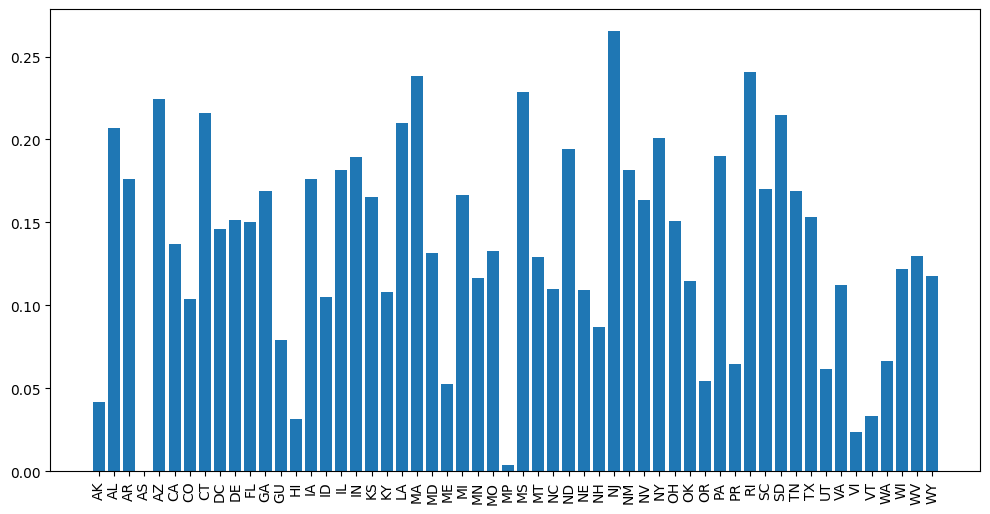

In [42]:
x = current['state']

y = current['death_percentage']
 


fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x=x, height=y)

plt.xticks(rotation=90)
plt.tight_layout
plt.show()

